In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline


In [ ]:
# import os
# for dirname,_,filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [41]:
IMAGE_SIZE=224

# Resizing and Appending to Lists

In [42]:
img_dir= "../input/car-plate-detection/images"

data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [43]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [44]:
path = '../input/car-plate-detection/annotations'
text_files = ['../input/car-plate-detection/annotations/'+ f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [46]:
X= np.array(X)
Y= np.array(y)


In [47]:
X= X/255
Y= Y/255

In [48]:
#import imgaug

# Splitting Data

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [ ]:
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2)



In [52]:
import tensorflow as tf

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Flatten


# Modelling and Compiling 

In [54]:
model= Sequential()
model.add(tf.keras.applications.EfficientNetB0(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.summary()

16711680/16705208 [==============================] - 0s 0us/step
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
flatten_36 (Flatten)         (None, 62720)             0         
_________________________________________________________________
dense_112 (Dense)            (None, 128)               8028288   
_________________________________________________________________
dense_113 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_114 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_115 (Dense)            (None, 4)                 260       
Total params: 12,102,887
Trainable params: 12,060,864


In [55]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [59]:
model=tf.keras.models.load_model("./ANPR_ASH.h5")

# Training Step

In [60]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
11/11 [==============================] - 9s 348ms/step - loss: 8.5183e-04 - accuracy: 0.9394 - val_loss: 0.0302 - val_accuracy: 0.5254
Epoch 2/200
11/11 [==============================] - 2s 215ms/step - loss: 7.9631e-04 - accuracy: 0.9515 - val_loss: 0.0297 - val_accuracy: 0.4407
Epoch 3/200
11/11 [==============================] - 2s 215ms/step - loss: 5.9980e-04 - accuracy: 0.9455 - val_loss: 0.0298 - val_accuracy: 0.5085
Epoch 4/200
11/11 [==============================] - 2s 215ms/step - loss: 5.6872e-04 - accuracy: 0.9394 - val_loss: 0.0269 - val_accuracy: 0.5254
Epoch 5/200
11/11 [==============================] - 2s 215ms/step - loss: 5.0248e-04 - accuracy: 0.9364 - val_loss: 0.0244 - val_accuracy: 0.5085
Epoch 6/200
11/11 [==============================] - 2s 219ms/step - loss: 4.6845e-04 - accuracy: 0.9242 - val_loss: 0.0242 - val_accuracy: 0.5254
Epoch 7/200
11/11 [==============================] - 2s 214ms/step - loss: 5.3366e-04 - accuracy: 0.9424 - val_loss: 0

In [62]:
model.save('ANPR_ASH.h5', overwrite=True) 

In [ ]:
model.save_weights("ANPR_ASH_WEIGHTS.H5")

In [61]:
accuracy=model.evaluate(X_test, y_test, verbose=0)
print("Accuracy : %.2f%%" % (accuracy[1]*100))

Accuracy : 86.36%


# ****Predictions****

In [98]:
X_test
y_cnn= model.predict(X_test)

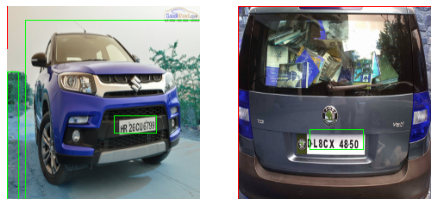

In [104]:
plt.figure(figsize=(20,40))
for i in range(0,2) :
        plt.subplot(1,5,i + 1)
        plt.axis('off')
        ny = y_cnn[i+5]*255
        image = cv2.rectangle(X_test[i+5],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0,0,255))
        plt.imshow(image)

In [95]:
y_cnn.shape

(44, 4)

# SCOPE OF IMPROVEMENT

1. Need More Training data.
2. Ability to properly implement some real-time image augmentations like horizontal flip.
3. Generate Synthetic Images.